In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as image
%matplotlib inline

# Load data

In [58]:
confirmed = pd.read_csv('../data/modified_covid/confirmed.csv')
confirmed = confirmed.fillna(0)
deaths = pd.read_csv('../data/modified_covid/deaths.csv')
deaths = deaths.fillna(0)
recovered = pd.read_csv('../data/modified_covid/recovered.csv')
recovered =recovered.fillna(0)

# Plotting stuff

In [59]:
plt.rcParams['font.family'] = 'Open Sans'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 14 
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 14 
plt.rcParams['axes.titlesize'] = 14

color = '#3c4ee0'

In [60]:
def only_nth_tick(n):
    ax = plt.gca()
    temp = ax.xaxis.get_ticklabels()
    temp = list(set(temp) - set(temp[::n]))
    for label in temp:
        label.set_visible(False)

# Confirmed infections - Line plot

(-0.5, 384.5, 3076.5, -0.5)

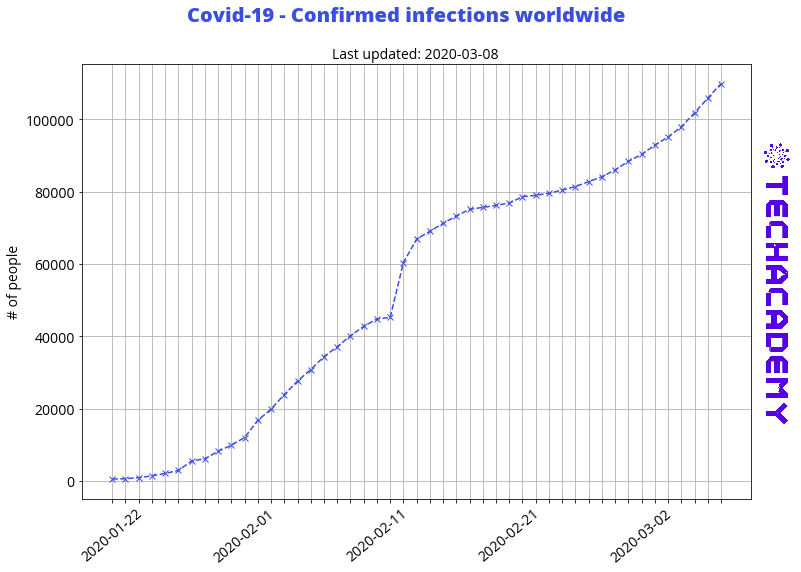

In [61]:
# data wrangling
confirmed = pd.read_csv('../data/modified_covid/confirmed.csv')
confirmed = confirmed.fillna(0)
data = confirmed.groupby(by='time').sum()['confirmed']

# plotting
fig = plt.figure(figsize=(12,8))
plt.plot(data.index, data.values,'--x', color = color)
plt.ylabel('# of people')
plt.title('Last updated: 2020-03-08 ')
plt.xticks(rotation=40)
only_nth_tick(10)
plt.grid()
plt.suptitle('Covid-19 - Confirmed infections worldwide',color=color,)

# Techacademy logo
im = image.imread('../../../Color logo with background.png')
newax = fig.add_axes([0.45, 0.25, 0.5, 0.5], anchor='NE', zorder=-1)
newax.imshow(im)
newax.axis('off')

# Stacked Area Plot
(Top 5 countries, see Economist). Use group_by country, date and arrange, filter



In [62]:
# get names of top6 countries
top6 = confirmed.groupby('country').max()['confirmed'].sort_values(ascending=False).head(6)

# store data in list
stack = []
for el in top6.index:
    stack.append(confirmed[confirmed['country']==el].groupby('time').sum()['confirmed'].values)
    
dates = confirmed[confirmed['country']==el].groupby('time').sum()['confirmed'].index

(-0.5, 384.5, 3076.5, -0.5)

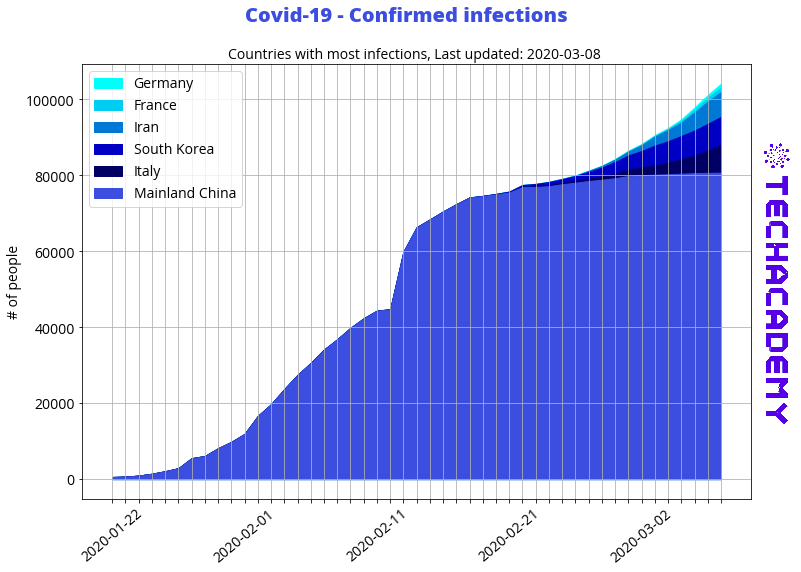

In [63]:
#plotting
fig = plt.figure(figsize=(12,8))
plt.rcParams
colors = ['#3c4ee0','#000064','#0000c5','#0078d6','#00cdf2','#00fffb']

for i in reversed(range(1,7)):
    plt.fill_between(dates, sum(stack[:i]),label=top6.index[i-1],color=colors[i-1])

plt.legend(loc= 'upper left')
plt.rcParams['image.cmap'] = 'Blues'
plt.ylabel('# of people')
plt.title('Countries with most infections, Last updated: 2020-03-08 ')
plt.xticks(rotation=40)
only_nth_tick(10)
plt.grid()
plt.suptitle('Covid-19 - Confirmed infections',color=color)

# Techacademy logo
im = image.imread('../../../Color logo with background.png')
newax = fig.add_axes([0.45, 0.25, 0.5, 0.5], anchor='NE', zorder=-1)
newax.imshow(im)
newax.axis('off')

# Merge

In [64]:
# merge
total = pd.merge(confirmed, deaths, on='id')
total = pd.merge(total, recovered, on='id')

# Comparison plots

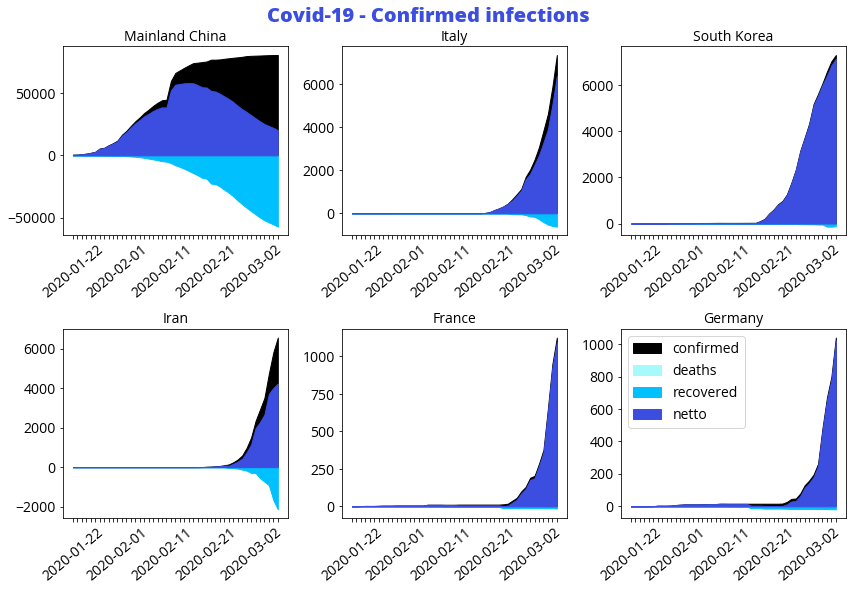

In [65]:
# compute netto infections
total['netto'] = total['confirmed']- total['deaths']-total['recovered']

# recovered & deaths should be negative
total['recovered'] = total['recovered']*-1
total['deaths'] = total['deaths']*-1

# get data for plot
data = total[total['country']==el].groupby('time').sum()[['confirmed','deaths','recovered','netto']]

# plotting
fig = plt.figure(figsize=(12,8))
plt.rcParams
colors = ['#000000','#a6fafb','#00c0fe','#3c4ee0','#00cdf2','#000000']
plt.suptitle('Covid-19 - Confirmed infections',color=color,y=1.02)
for i in range(1,7):
    plt.subplot(2,3,i)
    country= top6.index[i-1]
    data = total[total['country']==country].groupby('time').sum()[['confirmed','deaths','recovered','netto']]
    plt.title(country)
    plt.xticks(rotation=40)
    only_nth_tick(10)
    x = ['confirmed','deaths','recovered','netto']
    for i, el in enumerate(x):
        plt.fill_between(data.index, data[el],color=colors[i],label=el)
    only_nth_tick(10)
plt.legend(loc='upper left')
plt.tight_layout()

# Mortality rate

In [66]:
data = total.groupby(by='country').max()['netto'].sort_values(ascending=False)

total['recovered'] = total['recovered']*-1
total['deaths'] = total['deaths']*-1

x = total.groupby(by='country').sum()['deaths']/total.groupby(by='country').sum()['confirmed']
countries, values = x.sort_values(ascending=False)[:10].index, x.sort_values(ascending=False)[:10].values

(-0.5, 384.5, 3076.5, -0.5)

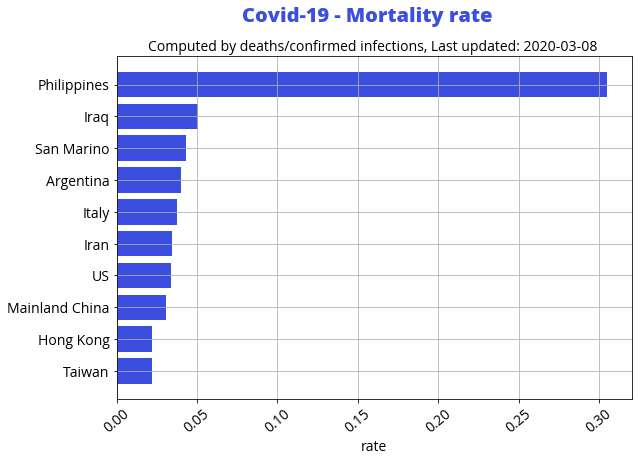

In [67]:
plt.figure(figsize=(8,6))

plt.title('Computed by deaths/confirmed infections, Last updated: 2020-03-08 ')
plt.xticks(rotation=40)
plt.grid()
plt.suptitle('Covid-19 - Mortality rate',color=color,y=1.05)

plt.xlabel('rate')
plt.tight_layout()
plt.barh(countries[::-1], values[::-1],color=color)

im = image.imread('../../../Color logo with background.png')
newax = fig.add_axes([0.4, 0., 0.5, 0.5], anchor='NE', zorder=-1)
newax.imshow(im)
newax.axis('off')

# Growth factor

/home/felix/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


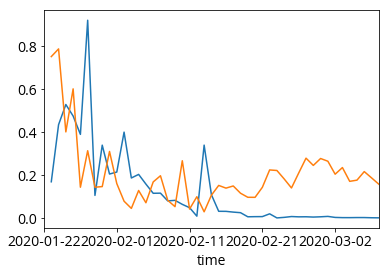

In [68]:
confirmed[confirmed.country == 'Mainland China'].groupby(by='time').sum()['confirmed'].pct_change().plot()
confirmed[confirmed.country != 'Mainland China'].groupby(by='time').sum()['confirmed'].pct_change().plot()

Sieht leider nicht so schön aus...